In [49]:
from collections import defaultdict
# Python program to find biconnected components in a given
# undirected graph
# Complexity : O(V + E)


from collections import defaultdict

# This class represents an directed graph
# using adjacency list representation
class Graph:

	def __init__(self, vertices):
		# No. of vertices
		self.V = vertices
		
		# default dictionary to store graph
		self.graph = defaultdict(list)
		
		# time is used to find discovery times
		self.Time = 0
		
		# Count is number of biconnected components
		self.count = 0

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)
		self.graph[v].append(u)

	'''A recursive function that finds and prints strongly connected
	components using DFS traversal
	u --> The vertex to be visited next
	disc[] --> Stores discovery times of visited vertices
	low[] -- >> earliest visited vertex (the vertex with minimum
			discovery time) that can be reached from subtree
			rooted with current vertex
	st -- >> To store visited edges'''
	def BCCUtil(self, u, parent, low, disc, st):

		# Count of children in current node
		children = 0

		# Initialize discovery time and low value
		disc[u] = self.Time
		low[u] = self.Time
		self.Time += 1


		# Recur for all the vertices adjacent to this vertex
		for v in self.graph[u]:
			# If v is not visited yet, then make it a child of u
			# in DFS tree and recur for it
			if disc[v] == -1 :
				parent[v] = u
				children += 1
				st.append((u, v)) # store the edge in stack
				self.BCCUtil(v, parent, low, disc, st)

				# Check if the subtree rooted with v has a connection to
				# one of the ancestors of u
				# Case 1 -- per Strongly Connected Components Article
				low[u] = min(low[u], low[v])

				# If u is an articulation point, pop
				# all edges from stack till (u, v)
				if parent[u] == -1 and children > 1 or parent[u] != -1 and low[v] >= disc[u]:
					self.count += 1 # increment count
					w = -1
					while w != (u, v):
						w = st.pop()
						print(w,end=" ")
					print()
			
			elif v != parent[u] and low[u] > disc[v]:
				'''Update low value of 'u' only of 'v' is still in stack
				(i.e. it's a back edge, not cross edge).
				Case 2
				-- per Strongly Connected Components Article'''

				low[u] = min(low [u], disc[v])
	
				st.append((u, v))


	# The function to do DFS traversal.
	# It uses recursive BCCUtil()
	def BCC(self):
		
		# Initialize disc and low, and parent arrays
		disc = [-1] * (self.V)
		low = [-1] * (self.V)
		parent = [-1] * (self.V)
		st = []

		# Call the recursive helper function to
		# find articulation points
		# in DFS tree rooted with vertex 'i'
		for i in range(self.V):
			if disc[i] == -1:
				self.BCCUtil(i, parent, low, disc, st)

			# If stack is not empty, pop all edges from stack
			if st:
				self.count = self.count + 1

				while st:
					w = st.pop()
					print(w,end=" ")
				print ()

In [50]:
g = Graph(12)

g.addEdge(0, 1)

g.addEdge(1, 2)

g.addEdge(1, 3)

g.addEdge(2, 3)

g.addEdge(2, 4)

g.addEdge(3, 4)

g.addEdge(1, 5)

g.addEdge(0, 6)

g.addEdge(5, 6)

g.addEdge(5, 7)

g.addEdge(5, 8)

g.addEdge(7, 8)

g.addEdge(8, 9)

g.addEdge(10, 11)

print(g.graph)
g.BCC();
print ("Above are % d biconnected components in graph" %(g.bicomp_number));
 


defaultdict(<class 'list'>, {1: [0, 2, 3, 5], 0: [1, 6], 2: [1, 3, 4], 3: [1, 2, 4], 4: [2, 3], 5: [1, 6, 7, 8], 6: [0, 5], 7: [5, 8], 8: [5, 7, 9], 9: [8], 11: [10], 10: [11]})
(4, 2) (3, 4) (3, 1) (2, 3) (1, 2) 
(8, 9) 
(8, 5) (7, 8) (5, 7) 
(6, 0) (5, 6) (1, 5) (0, 1) 
(10, 11) 
Above are  5 biconnected components in graph


In [51]:
test = open('old.txt','r')

test_list = test.read().split()

nodes_number = int(test_list.pop(0))
# Creat graph by adding edges in graph

g = Graph(nodes_number)

while test_list:
    u = int(test_list.pop(0))
    v = int(test_list.pop(0))
    g.addEdge(u,v)

print(g.graph)
print()
g.BCC();
print ("Above are % d biconnected components in graph" %(g.bicomp_number));

defaultdict(<class 'list'>, {6: [1, 4, 0, 14], 1: [6, 14, 0, 5], 14: [1, 5, 0, 6], 4: [2, 3, 6, 7, 10], 2: [4, 10], 10: [2, 4, 15], 3: [4, 15], 15: [3, 10], 7: [4, 9], 5: [14, 0, 1], 0: [1, 5, 6, 14], 9: [7, 8], 8: [9, 12, 13], 12: [8, 11, 13], 13: [8, 11, 12], 11: [12, 13]})

(3, 4) (15, 3) (10, 15) (10, 4) (2, 10) (4, 2) 
(13, 8) (11, 13) (12, 11) (8, 12) 
(9, 8) 
(7, 9) 
(4, 7) 
(6, 4) 
(5, 0) (14, 5) (14, 1) (6, 14) (6, 0) (1, 6) (0, 1) 
Above are  7 biconnected components in graph


In [53]:
a = [-1] * (3)
print(a)

[-1, -1, -1]


In [57]:
a =[(1,2),(2,3)]

b = [1,2]

b+=[a]

b[2]

[(1, 2), (2, 3)]

In [69]:
a= list(range(10))
b = list(range(11,20))

c =a.pop(0)
b += [a.pop(0)]
b += [a.pop(0)]

print(a)
print(b)


[3, 4, 5, 6, 7, 8, 9]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 2]


In [2]:
a = (1,2)
print(set(a))

{1, 2}


In [3]:
# DFS to find biconnected component

from collections import defaultdict
from time import time

import sys


# The class for graph
class Graph:

    def __init__(self):
        
        # Default the set of nodes and edges in graph
        self.edges = set()
        self.nodes = set() 

        # default dictionary to store graph edges
        self.graph = defaultdict(list)

        # default dictionary to store LOW number of each node
        self.low_number = defaultdict(int)

        # default dictionary to store DFS search sequence number of each node
        self.dfs_number = defaultdict(int)

        # set a counter for the DFS # in the DFS tree
        self.dfs_counter = 0

        # default a list to store the biconnected components
        self.bicomp = list()

        # default a set for the articulation points
        self.articulations = set()

        # default a direction tree with DFS pash
        self.dfs_tree = defaultdict(list)

    # function to add an edge to graph
    def add_edge(self, u, v):

        if u in self.graph[v]:                  # Check if the edge already have
            print(f'edge ({u},{v}) exists')
        else:
            self.graph[u].append(v) 
            self.graph[v].append(u)
            
            # Update the edges and nodes list
            self.edges.add((v,u))
            self.nodes = set(self.graph.keys())
            
            # reset bfs abd low number
            self.low_number = defaultdict(int)
            self.dfs_number = defaultdict(int)


    # Function to add multiple edges from a list
    def add_Edge_from_list(self,edgelist):
        for edge in edgelist:
            self.add_edge(edge[0],edge[1])


    # Global initialization for DFS
    def initialization(self):
        # Set the DFS number for all the nodes to -1
        for i in self.nodes:
            self.dfs_number[i] = -1
        
        # Set DFS discover counter to 0
        self.dfs_counter = 0

    
    def DFS(self):
        self.initialization()
        store = list()
        for node in self.nodes:
            if self.dfs_number[node] == -1:
                # Call the DFS travl
                self.__dfs(node, store)
        


    def __dfs(self, v, store):
        # Initialization
        self.dfs_counter += 1
        self.dfs_number[v] = self.dfs_counter
        self.low_number[v] = self.dfs_counter

        for x in self.graph[v]:
            if self.dfs_number[x] == -1:       # x is undiscovered
                store += [(v,x)]
                self.dfs_tree[v].append(x)
                
                self.__dfs(x, store)

                self.low_number[v] = min(self.low_number[v], self.low_number[x])
                

                if self.low_number[x] >= self.dfs_number[v]:

                    # In this algorithm, every root point will become to articulation points
                    # Use this to check if the root point is a articulation point.
                    if not (self.dfs_number[v] == 1 and self.low_number[x] == self.dfs_number[v]):
                        self.articulations.add(v)

                    # Store the biconnnected components list       
                    bicomp = []
                    a=()
                    while a != (v,x):
                        a = store.pop()
                        bicomp += [a]
                    self.bicomp += [bicomp]

            elif v not in self.dfs_tree[x]:            # x is not v's parent
                # Check the edges if already been exposed
                if self.dfs_number[v] > self.dfs_number[x]:   
                    store += [(v,x)]                            
                self.low_number[v] = min(self.low_number[v], self.dfs_number[x])

 
def main():
    # Try to open each file by sequence
    for i in range(1,len(sys.argv)):
        test_name = sys.argv[i]
        test = None
        try:
            test = open(test_name,'r')
        except IOError as ex:
            print(ex)

        # If open success, process the data.
        if test:
            test_list = test.read().split()
            
            test_list.pop(0)        # Delete the first number (which is the number of nodes)

            # Creat graph by adding edges in graph
            G = Graph()
            while test_list:
                u = int(test_list.pop(0))
                v = int(test_list.pop(0))
                G.add_edge(u,v)

            # Begin to conting the processing time.
            start_time = time()

            # Main function to do the DFS
            G.DFS()

            end_time = time()
            run_time = (end_time - start_time) * 10001

            if len(G.nodes) <= 20:
                # Print biconnected comoponents
                for i in range(len(G.bicomp)):
                    print('Component %d :   ' %(i+1), end = '{' )

                    l = len(G.bicomp[i])
                    for edge in G.bicomp[i]:
                        if edge == G.bicomp[i][l-1]:
                            print(set(edge), end='} \n')
                        else:
                            print(set(edge), end=', ')

                print('Articulations: ', G.articulations)
            
            print('Summary: %s, %d, %d, %d, %d, %f' % (test_name, len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp), run_time))
            print()

def test():
    G=Graph()
    edges = [(1,2),(1,3),(2,3),(1,4),(4,5),(4,6),]
    G.add_Edge_from_list(edges)
    G.DFS()
    for i in range(len(G.bicomp)):
        print('Component %d:   ' %(i+1), end = '{' )

        l = len(G.bicomp[i])
        for edge in G.bicomp[i]:
            if edge == G.bicomp[i][l-1]:
                print(set(edge), end='} \n')
            else:
                print(set(edge), end=',')

    
    print('Articulations: ', G.articulations)
    print('Summary: %s, %d, %d, %d' % (len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp)))
    print()


if __name__ == '__main__':
    #main()
    test()



Component 1:   {{1, 3},{2, 3},{1, 2}} 
Component 2:   {{4, 5}} 
Component 3:   {{4, 6}} 
Component 4:   {{1, 4}} 
Articulations:  {1, 4}
Summary: 6, 6, 2, 4



In [14]:
import pandas as pd
from glob import glob

In [21]:
def cvs():
    # Try to open each file by sequence
    df = pd.DataFrame(columns=['nodes_number','edges_number','run_time'])

    for file in glob('tests/*.txt'):

        test = None
        try:
            test = open(file,'r')
        except IOError as ex:
            print(ex)

        # If open success, process the data.
        if test:
            test_list = test.read().split()
            
            test_list.pop(0)        # Delete the first number (which is the number of nodes)

            # Creat graph by adding edges in graph
            G = Graph()
            while test_list:
                u = int(test_list.pop(0))
                v = int(test_list.pop(0))
                G.add_edge(u,v)

            # Begin to conting the processing time.
            start_time = time()

            # Main function to do the DFS
            G.DFS()

            end_time = time()
            run_time = (end_time - start_time) * 1000

            #print('Summary: %s, %d, %d, %d, %d, %f' % (file, len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp), run_time))
            #print()

            df = df.append({'nodes_number' : len(G.nodes), 'edges_number' : len(G.edges), 'run_time' : run_time}, ignore_index=1)

    return df  
        
df = cvs()

In [22]:
print(df)

    nodes_number  edges_number   run_time
0           64.0         428.0   0.777006
1          128.0        1224.0   1.576900
2          128.0        1373.0   1.660824
3           16.0          58.0   0.074863
4           64.0         373.0   0.455141
..           ...           ...        ...
58         256.0        1508.0   1.812935
59          16.0          38.0   0.066042
60          16.0          62.0   0.070810
61         256.0        1492.0   1.756907
62         512.0       11213.0  13.270140

[63 rows x 3 columns]


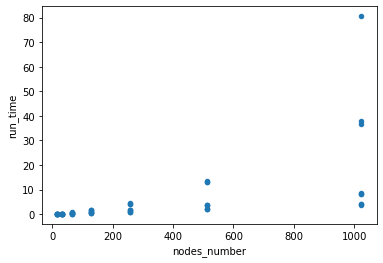

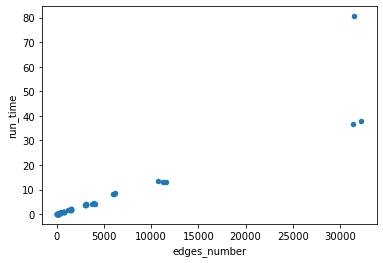

In [28]:
import matplotlib as plot

node_plot = df.plot.scatter(x='nodes_number', y='run_time')

edge_plot = df.plot.scatter(x='edges_number', y='run_time')